In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)

In [3]:
 output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model1 = Sequential()
model1.add(Embedding(10000, 32))
model1.add(SimpleRNN(32, return_sequences=True))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### 多个循环逐层叠加

In [6]:
model3=Sequential()
model3.add(Embedding(10000, 32))
model3.add(SimpleRNN(32, return_sequences=True))
model3.add(SimpleRNN(32, return_sequences=True))
model3.add(SimpleRNN(32, return_sequences=True))
model3.add(SimpleRNN(32))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [11]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train,y_train), (input_test, y_test)=imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'input_test')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 input_test
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### 用Embedding层和SimpleRNN层来训练模型

In [12]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 60s 95ms/step - loss: 0.5083 - acc: 0.7524 - val_loss: 0.4148 - val_acc: 0.8296
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3537 - acc: 0.8572 - val_loss: 0.4296 - val_acc: 0.8070
Epoch 3/10
625/625 [==============================] - 59s 95ms/step - loss: 0.3617 - acc: 0.8595 - val_loss: 0.4060 - val_acc: 0.8390
Epoch 4/10
625/625 [==============================] - 60s 95ms/step - loss: 0.2959 - acc: 0.8867 - val_loss: 0.3518 - val_acc: 0.8684
Epoch 5/10
625/625 [==============================] - 59s 95ms/step - loss: 0.2638 - acc: 0.9019 - val_loss: 0.3826 - val_acc: 0.8350
Epoch 6/10
625/625 [==============================] - 60s 96ms/step - loss: 0.2590 - acc: 0.9004 - val_loss: 0.3527 - val_acc: 0.8528
Epoch 7/10
625/625 [==============================] - 59s 95ms/step - loss: 0.2417 - acc: 0.9070 - val_loss: 0.3817 - val_acc: 0.8276
Epoch 8/10
625/625 [==============================] - 59s 94ms

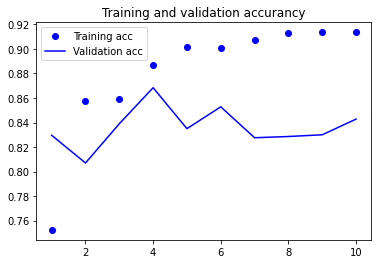

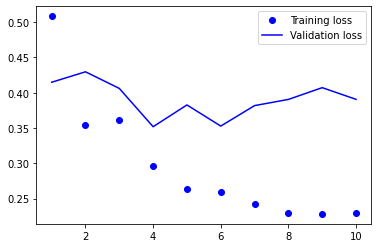

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accurancy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

## LSTM

In [16]:
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 107s 171ms/step - loss: 0.4503 - acc: 0.7885 - val_loss: 0.3212 - val_acc: 0.8696
Epoch 2/10
 43/625 [=>............................] - ETA: 1:29 - loss: 0.2791 - acc: 0.8946

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accurancy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()